<a href="https://colab.research.google.com/github/prasenjitsarkar001/Airline-project1/blob/main/airline_SMA%2CEWMA%2CPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [ ]:
import pandas as pd

In [ ]:
airline=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


SMA-- simple moving avg.  ///
EWMA-- exp. weighted moving avg

lets try to slove the problem through sma

In [ ]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()
airline['120-month-SMA']=airline['Thousands of Passengers'].rolling(window=120).mean()
airline['1200-month-SMA']=airline['Thousands of Passengers'].rolling(window=1200).mean()
airline['12000-month-SMA']=airline['Thousands of Passengers'].rolling(window=12000).mean()
airline['1800-month-SMA']=airline['Thousands of Passengers'].rolling(window=1800).mean()

<Axes: xlabel='Month'>

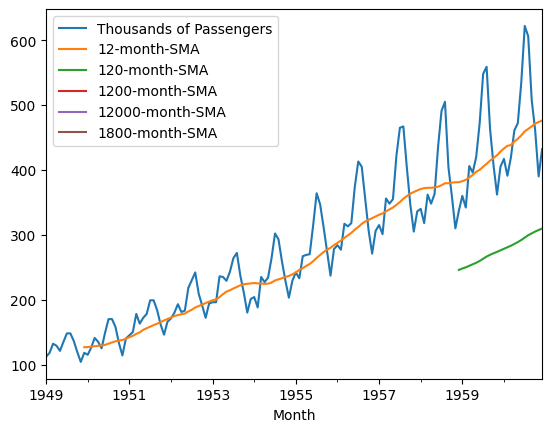

In [ ]:
airline.plot()

sma not slove this problem

lets try to slove the problem through EWMA

In [ ]:
airline_1=airline

In [ ]:
airline_1['EWMA12']=airline_1['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline_1['EWMA120']=airline_1['Thousands of Passengers'].ewm(span=120,adjust=False).mean()
airline_1['EWMA1200']=airline_1['Thousands of Passengers'].ewm(span=1200,adjust=False).mean()
airline_1['EWMA12000']=airline_1['Thousands of Passengers'].ewm(span=12000,adjust=False).mean()


<Axes: xlabel='Month'>

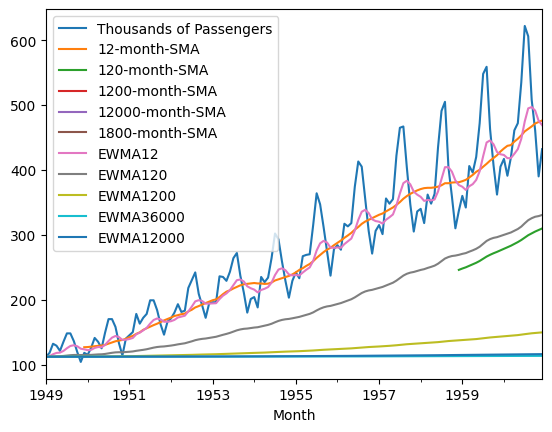

In [ ]:
airline_1.plot()

In [ ]:
airline_1

,Thousands of Passengers,12-month-SMA,120-month-SMA,1200-month-SMA,12000-month-SMA,1800-month-SMA,EWMA12,EWMA120,EWMA1200,EWMA36000,EWMA12000
Month,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,112.000000,112.000000,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,112.923077,112.099174,112.009992,112.000333,112.001000
1949-03-01,132,NaN,NaN,NaN,NaN,NaN,115.857988,112.428113,112.043281,112.001444,112.004333
1949-04-01,129,NaN,NaN,NaN,NaN,NaN,117.879836,112.702028,112.071518,112.002389,112.007165
1949-05-01,121,NaN,NaN,NaN,NaN,NaN,118.359861,112.839185,112.086387,112.002889,112.008664
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,463.333333,299.341667,NaN,NaN,NaN,494.898619,322.504575,147.552158,113.268730,115.788004
1960-09-01,508,467.083333,302.258333,NaN,NaN,NaN,496.914216,325.570615,148.152404,113.290659,115.853368
1960-10-01,461,471.583333,304.991667,NaN,NaN,NaN,491.388952,327.809117,148.673382,113.309975,115.910887


# //LET'S TRY WITH META-LIB **PROPHET**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd

In [ ]:
airline=pd.read_csv('airline_passengers.csv')

In [ ]:
airline

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
from prophet import Prophet

In [ ]:
airline.columns=['ds','y']

In [ ]:
airline['ds']=pd.to_datetime(airline['ds'])

In [ ]:
airline

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
m=Prophet()
m.fit(airline)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg8q6ao54/zh0kilnl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg8q6ao54/st950oi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7698', 'data', 'file=/tmp/tmpg8q6ao54/zh0kilnl.json', 'init=/tmp/tmpg8q6ao54/st950oi9.json', 'output', 'file=/tmp/tmpg8q6ao54/prophet_modelytcw5y45/prophet_model-20250213180412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1200,freq='MS')

In [ ]:
airline.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
forecast=m.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1339,2060-08-01,4162.301449,3549.628813,4968.271985,3476.261015,4907.280764,68.481906,68.481906,68.481906,68.481906,68.481906,68.481906,0.0,0.0,0.0,4230.783355
1340,2060-09-01,4165.433098,3498.035971,4919.325490,3478.861957,4911.843158,16.162119,16.162119,16.162119,16.162119,16.162119,16.162119,0.0,0.0,0.0,4181.595218
1341,2060-10-01,4168.463727,3474.204086,4885.638800,3481.336405,4916.304530,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,0.0,0.0,0.0,4146.987723
1342,2060-11-01,4171.595376,3429.215086,4851.564007,3483.918184,4920.866500,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,0.0,0.0,0.0,4112.134606
1343,2060-12-01,4174.626004,3457.141629,4886.710760,3486.679346,4924.918009,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,0.0,0.0,0.0,4141.280074


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
1332,2060-01-01,4116.195883,3446.542253,4842.515054
1333,2060-02-01,4109.161527,3427.301694,4837.783037
1334,2060-03-01,4144.769800,3466.520258,4882.075609
1335,2060-04-01,4146.005503,3473.308184,4883.057461
1336,2060-05-01,4148.589275,3470.270953,4895.845090
1337,2060-06-01,4191.356469,3509.913758,4928.978406
1338,2060-07-01,4229.885549,3557.174868,4966.618899
1339,2060-08-01,4230.783355,3549.628813,4968.271985
1340,2060-09-01,4181.595218,3498.035971,4919.325490
1341,2060-10-01,4146.987723,3474.204086,4885.638800


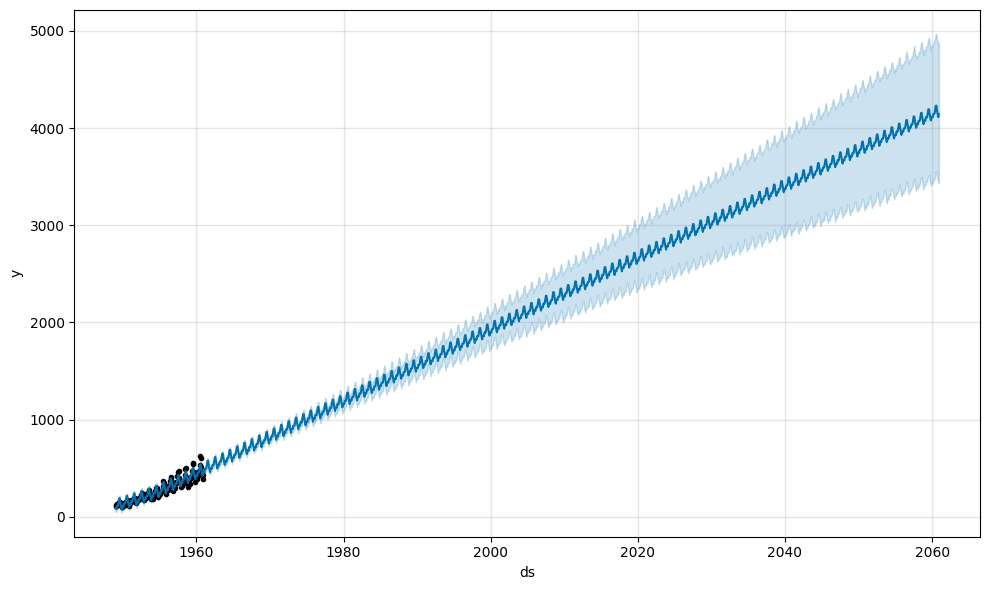

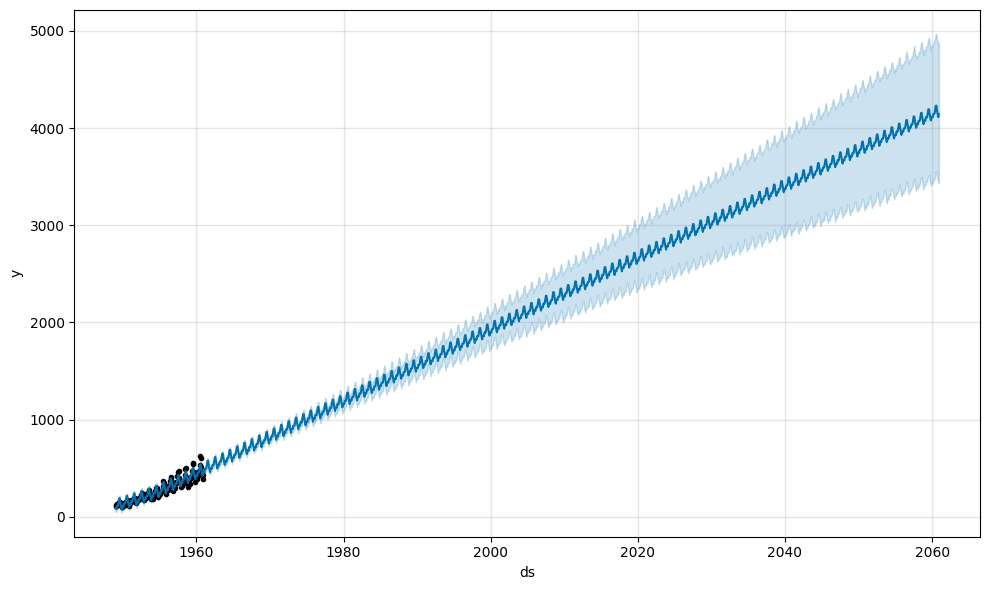

In [ ]:
m.plot(forecast)